1.	System Setup (do this and all future steps for portable systems in your group):

a.	Connect the D3S radiation spectrometer to your portable Raspberry pi system. 

b.	Turn on the detector by holding down the large button until the LED above the button turns from white to light green.

c.	Make sure all other sensors, including the GPS sensor and the full antenna are connected.


2.	Data Acquisition

a.	Take your system outside and turn it on and/or make sure it is connected to your phone hotspot.

b.	Make sure the GPS sensor gets a fix.

c.	Launch the mapping GUI from the icon on the system desktop and select the radiation and AQ sensors for data collection. Select the radiation data to be displayed. Make sure you have selected to save data and are collected data in 5s intervals.

d.	Start the data collection – this will pop up a map that should center on your location and show the current level of the radiation counts.

e.	Walk together in whatever direction you like at a slow pace, stopping approximately every 30m and waiting for ~30 seconds.


3.	Data Analysis

a.	Plot the time/position dependence of all radiation data on the same graph (so if you have two devices, you should have two sets of data). How do the two (or three) sets of measurements compare?




In [1]:
import math
import numpy as np
import pandas as pd
# This line allows plots to show in the Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data_Gilder = pd.read_csv('WalkingDataGilder.csv')
data_Dominic = pd.read_csv('walkingdata_Dom.csv')

(-122.260108333, -122.255948333)

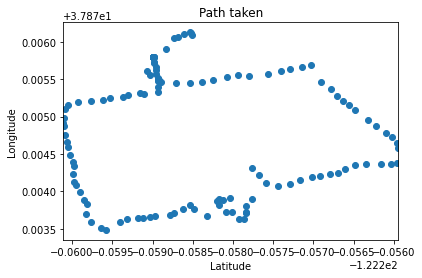

In [3]:
plt.scatter(x=data_Gilder['Longitude'], y = data_Gilder['Latitude'])
low = min(data_Gilder['Longitude'])
high = max(data_Gilder['Longitude'])
plt.title('Path taken')
plt.ylabel('Longitude')
plt.xlabel('Latitude')


plt.xlim(low,high)

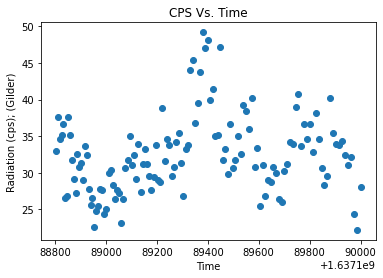

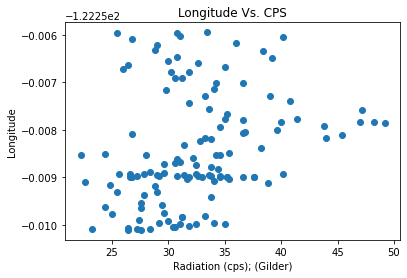

In [10]:
plt.ylabel('Radiation (cps); (Gilder)')
plt.xlabel('Time')
plt.title('CPS Vs. Time')
plt.show(plt.scatter( x = data_Gilder['Epoch time'] , y = data_Gilder['Radiation (cps)']))

plt.xlabel('Radiation (cps); (Gilder)')
plt.ylabel('Longitude')
plt.title('Longitude Vs. CPS')
plt.show(plt.scatter(x=data_Gilder['Radiation (cps)'], y = data_Gilder['Longitude']))

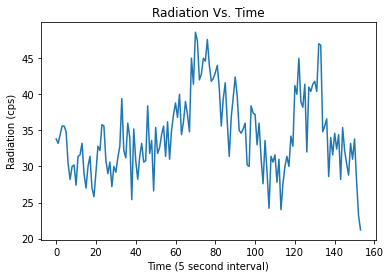

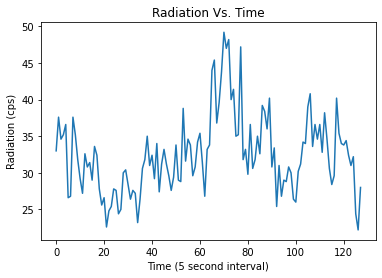

In [19]:
plt.plot(data_Dominic['Radiation (cps)'])
plt.xlabel('Time (5 second interval)')
plt.ylabel('Radiation (cps)')
plt.title('Radiation Vs. Time')
plt.show()

plt.plot(data_Gilder['Radiation (cps)'])
plt.xlabel('Time (5 second interval)')
plt.ylabel('Radiation (cps)')
plt.title('Radiation Vs. Time')
plt.show()

Since only one of our data sets had associated positional data, we could only compare one data set to its latitude and longitude. (One detector was started at a different time so there is no reliable to match the data) Considering that all the data was taken on foot, there is not enough change in either latitude or longitude to create any noticeable relationhship between latitude/longitude and cps. It would probably be more worthwhile do examine the actual environment in comparison the cps data.

b.	Plot histograms of the full data sets that show the count distribution clearly. Calculate the mean and standard deviation of both sets of data. Do the multiple sets of data agree with each other statistically?



32.47656249999999
5.338019359612116


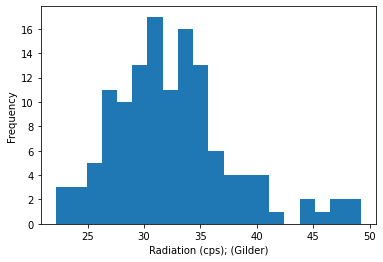

In [5]:
plt.hist(data_Gilder['Radiation (cps)'],bins = 20)
plt.xlabel('Radiation (cps); (Gilder)')
plt.ylabel('Frequency')
plt.show

gild_cpm_mean = np.mean(data_Gilder['Radiation (cps)'])
gild_cpm_std = np.std(data_Gilder['Radiation (cps)'])
print(gild_cpm_mean)
print(gild_cpm_std)

34.485714285714266
5.459168727113555


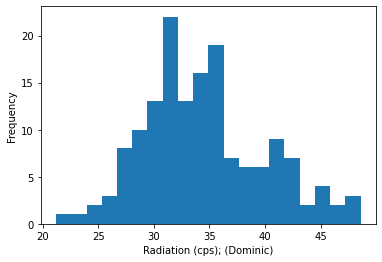

In [6]:
plt.hist(data_Dominic['Radiation (cps)'], bins = 20)
plt.xlabel('Radiation (cps); (Dominic)')
plt.ylabel('Frequency')
plt.show

dom_cpm_mean = np.mean(data_Dominic['Radiation (cps)'])
dom_cpm_std = np.std(data_Dominic['Radiation (cps)'])
print(dom_cpm_mean)
print(dom_cpm_std)

These two data sets veyr much generally agree statistically, though the counts are random in each interval, the mean number of counts are generally similar and if we were to even more sets of CPS data I would expect results in the low 30's range as well. Additionally, the standard deviation of each set were even more similar than the mean which also indicates similarity.

c.	You are collecting radiation counts, which should follow counting statistics (σ = √N). Using the mean of your full data set as an estimate of the expected number of counts, what variation would you expect if the data was only varying because of counting statistics? How does this compare to the measured standard deviation in your full data set?

In [7]:
sigma_dom_cps = np.sqrt(dom_cpm_mean)
sigma_gild_cps = np.sqrt(gild_cpm_mean)
print(sigma_dom_cps)
print(sigma_gild_cps)

5.872453855562789
5.698821150027433


d.	We learned from the central limit theorem that we can estimate the uncertainty on the mean and standard deviation of a distribution (and indeed, any properties of the distribution) based on how many times we sampled from that distribution. 

i.	You can test if your measured and expected variance are in statistical agreement by estimating the uncertainty on your measured standard deviation from the central limit theorem. This uncertainty would be:

In [8]:
#uncertainty on sigma = sigma_total / total_counts = sqrt (sig_dom^2 + sig_gild^2 / mu_dom + mu_gild)
sig_uncert = np.sqrt( ( (dom_cpm_std**2) + (gild_cpm_std**2) )/(dom_cpm_mean + gild_cpm_mean) )
print(sig_uncert)

0.9330564082750717


e.	From your estimate of the expected variance, and the uncertainty on that estimate, did you see more variation in the data than you would expect from simple counting statistics? What does this imply about the sources of radiation contributing to your data?

NOTE: If you were only able to collect one set of data, please do any comparisons of multiple sets of data with data I provide through bCourses. You can use a single set of data for any discussion of variance in the data set as a whole.

I did not see any outstanding variation in our data and everything fell relatively well within range of the other data. These data meet my expectations for any simple statistical variation and I don't think any super abnormal radiation was present and the detector were generally pretty equally exposed to the same source.